In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Exploring the data
df = pd.read_csv('D:/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Understanding the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
#Mapping the species columns with numeric values
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.duplicated().sum()

3

In [13]:
df=df.drop_duplicates()

df.duplicated().sum()

0

In [14]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
data = {'species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']}
my_data = pd.DataFrame(data)

In [17]:
label_encoder = LabelEncoder()

In [18]:
df['species_num'] = label_encoder.fit_transform(df['species'])

df['species'] = label_encoder.inverse_transform(df['species_num'])

In [19]:
print(my_data)

           species
0      Iris-setosa
1  Iris-versicolor
2   Iris-virginica


In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [21]:
df= df.drop(columns=['species'])

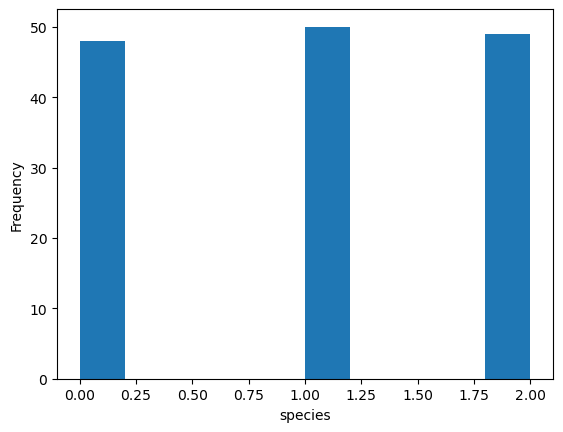

In [23]:
#Exploring the data analysis
plt.hist(df['species_num'])
plt.xlabel('species')
plt.ylabel('Frequency')
plt.show()

In [24]:
import seaborn as sns

In [27]:
import pandas as pd

# Assuming you have already imported your DataFrame 'df'
correlation_matrix = df.corr()
print(correlation_matrix)


              sepal_length  sepal_width  petal_length  petal_width  \
sepal_length      1.000000    -0.109321      0.871305     0.817058   
sepal_width      -0.109321     1.000000     -0.421057    -0.356376   
petal_length      0.871305    -0.421057      1.000000     0.961883   
petal_width       0.817058    -0.356376      0.961883     1.000000   
species_num       0.782904    -0.418348      0.948339     0.955693   

              species_num  
sepal_length     0.782904  
sepal_width     -0.418348  
petal_length     0.948339  
petal_width      0.955693  
species_num      1.000000  


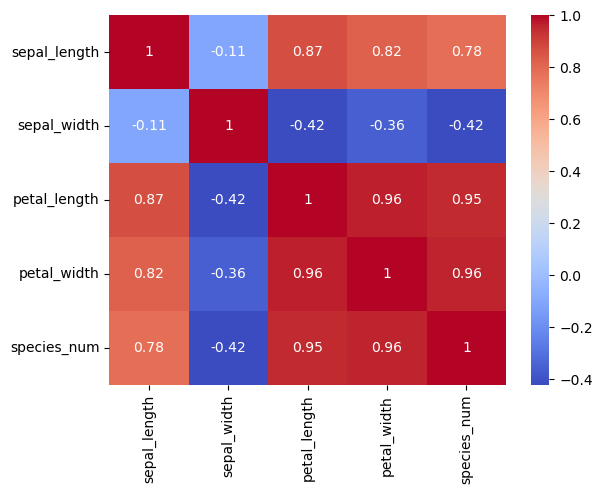

In [28]:
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

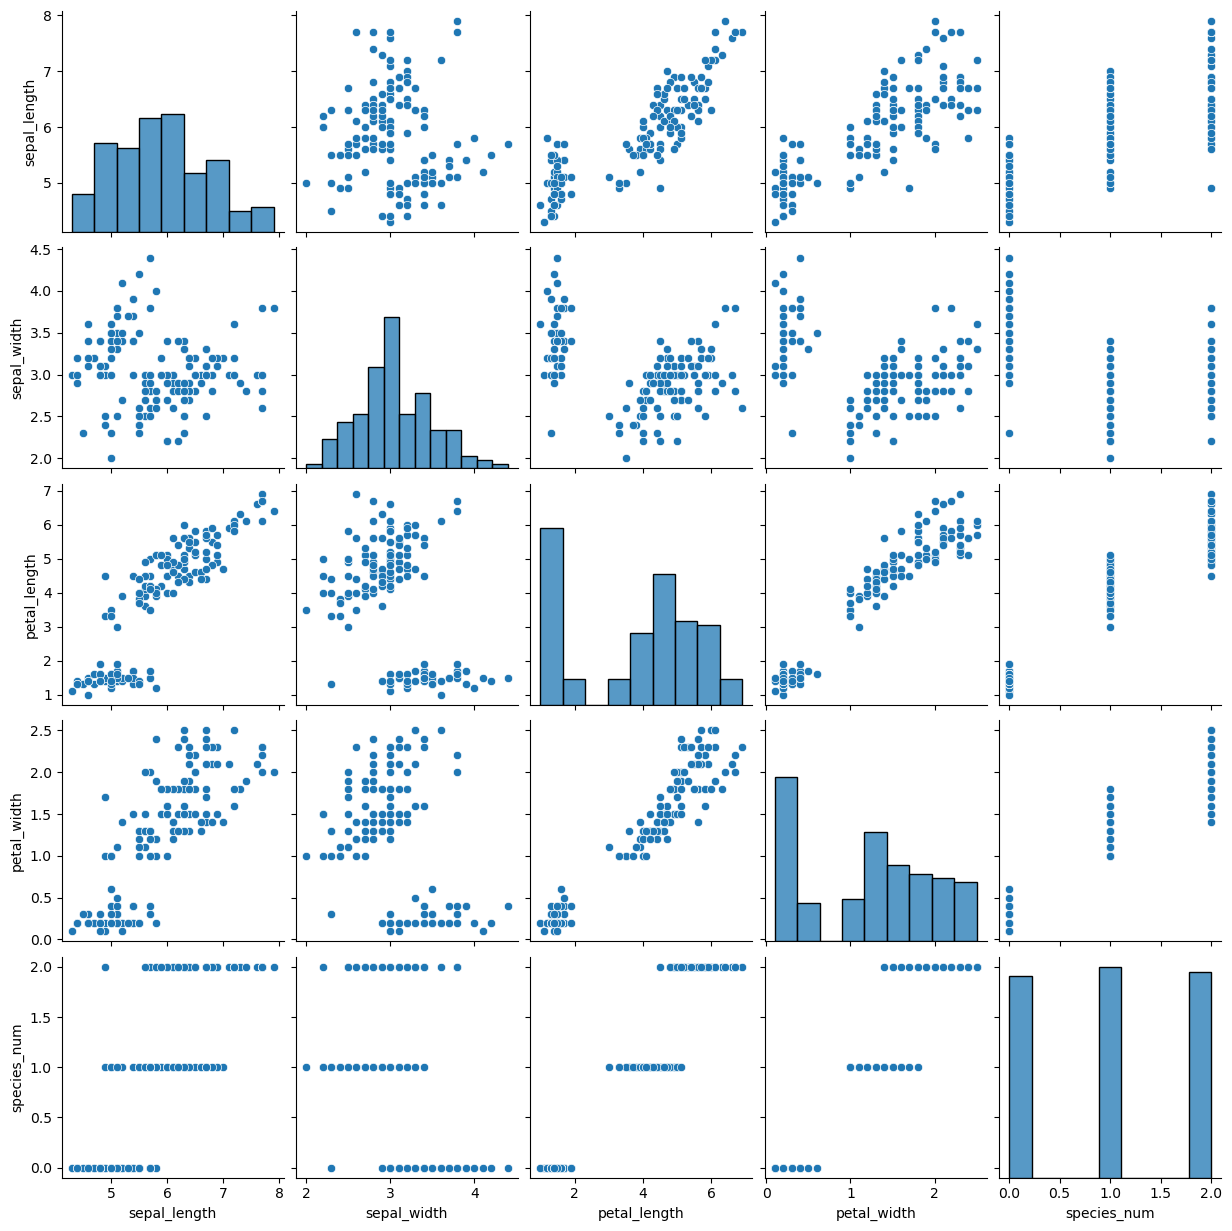

In [29]:
sns.pairplot(df)
plt.show()

In [30]:
#Spliting the data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_num, Length: 147, dtype: int32

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [34]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(30, 4)
(117, 4)
(30,)
(117,)


In [35]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
69,5.6,2.5,3.9,1.1
16,5.4,3.9,1.3,0.4
146,6.3,2.5,5.0,1.9
7,5.0,3.4,1.5,0.2
5,5.4,3.9,1.7,0.4


In [36]:
y_train.head()

69     1
16     0
146    2
7      0
5      0
Name: species_num, dtype: int32

In [37]:
#Training the Model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [38]:
reg.coef_

array([-0.08827642, -0.06820524,  0.19171326,  0.66364361])

In [39]:
reg.intercept_

0.19388586489641968

In [40]:
#Testing the model
y_pred = reg.predict(X_test)
y_pred=y_pred.round().astype(int)

In [41]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted Value': y_pred})
print(df_pred)

     Actual  Predicted Value
65        1                1
132       2                2
112       2                2
3         0                0
138       2                2
139       2                2
134       2                1
19        0                0
48        0                0
107       2                2
90        1                1
78        1                1
28        0                0
10        0                0
63        1                1
18        0                0
97        1                1
20        0                0
79        1                1
77        1                1
71        1                1
46        0                0
2         0                0
30        0                0
17        0                0
121       2                2
141       2                2
49        0                0
129       2                2
9         0                0


In [42]:
#Evaluation of the model
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [43]:
print(mae)
print(mse)
print(rmse)

0.03333333333333333
0.03333333333333333
0.18257418583505536


In [44]:
from sklearn.metrics import r2_score

In [45]:
print(r2_score(y_test,y_pred))

0.953416149068323


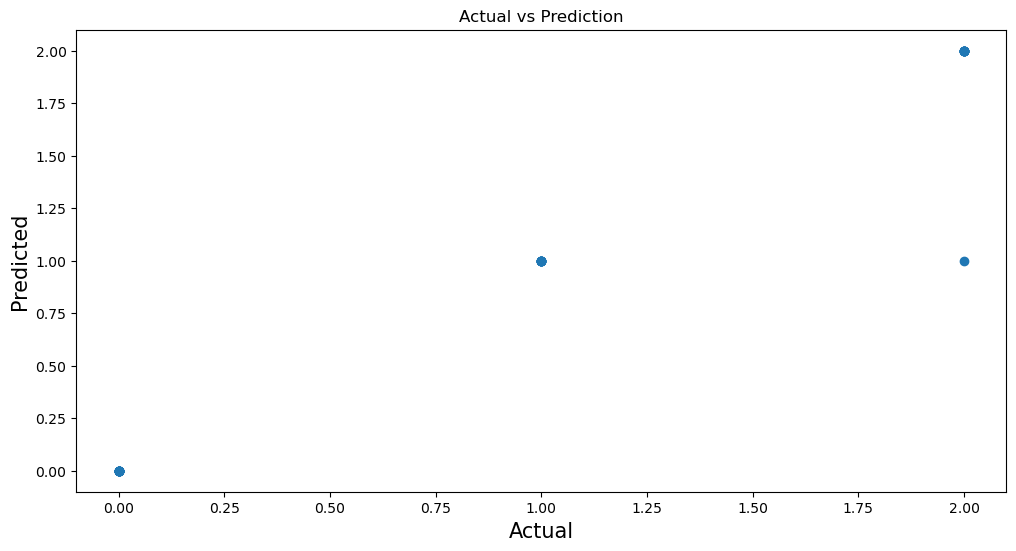

In [46]:
# Create a new figure with subplots
fig, (ax1) = plt.subplots(1, figsize=(12, 6))

# Scatter plot of actual versus predicted values on the first subplot
ax1.scatter(y_test, y_pred)
ax1.set_title('Actual vs Prediction')
ax1.set_xlabel('Actual', fontsize=15)
ax1.set_ylabel('Predicted', fontsize=15)

#show the plot
plt.show()